In [21]:
# # https://pypi.org/project/quickdraw
# from quickdraw import QuickDrawData
import numpy as np
import urllib.request
import os
import glob as gb
import pathlib
import random
import torch
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import random_split, TensorDataset, DataLoader

In [19]:
# 난수 고정
def set_seed(seed):
    # os.environ['PYTHONASHSEED'] = 0 무작위화 비활성화
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

# 이미지 저장
def save_figure(figure_name, figure_base_path = './figure/', figure_extension='.png', resolution=300):
    # make directory
    try:
        if not os.path.exists(figure_base_path):
            os.makedirs(figure_base_path)
    except:
      print('already exists')
    
    figure_path = figure_base_path + figure_name + figure_extension
    print('save figure: ', figure_name)
    
    plt.savefig(figure_path, bbox_inches='tight', format=figure_extension[1:], dpi=resolution)
    
    
set_seed(1)

In [25]:
# Get image labels
def get_labels():
  f = open('./30_labels.txt', 'r')
  labels = f.readlines()
  f.close()
  
  labels = [l.replace('\n', '') for l in labels]
  return labels

In [26]:
def load_dataset():
  # make directory
  dataset_path = './dataset/'
  try:
    if not os.path.exists(dataset_path):
      os.makedirs(dataset_path)
  except:
      None
      
  # get data from web
  labels = get_labels()
  base_url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for label in labels:
    label_url = label.replace('_', '%20')
    npy_url = base_url + label_url + '.npy'
    print(npy_url)
    urllib.request.urlretrieve(npy_url, dataset_path + label + '.npy')

  print('Done!')
  
load_dataset()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cup.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/duck.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy
ht

In [6]:
# https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader

def prepare_dataset(test_ratio=0.2, max_items_per_class=10000):
    npy_files = gb.glob('./dataset/*.npy')

    #initialize variables 
    x = np.empty([0, 784]) # 28*28 =784
    y = np.empty([0])
    classes = []

    #load a subset of the data to memory 
    for idx, npy_file in enumerate(npy_files):
        data = np.load(npy_file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)
    
        label, extension = os.path.splitext(os.path.basename(npy_file))
        classes.append(label)

    data = None
    labels = None
    
    # transform to torch tensor
    tensor_x = torch.Tensor(x)
    tensor_x = tensor_x.reshape(tensor_x.shape[0], 1, 28, 28)
    tensor_y = torch.Tensor(y)
    
    # create dataset
    dataset = TensorDataset(tensor_x, tensor_y)

    #separate into train data and test data
    lengths = [int(len(dataset)*(1-test_ratio)), int(len(dataset)*test_ratio)]
    
    train_dataset, test_dataset = random_split(dataset=dataset, lengths=lengths)
    
    return train_dataset, test_dataset, classes

In [3]:
# Get cpu or gpu device for training.
if torch.cuda.is_available():
  DEVICE = torch.device('cuda:0')
else:
  DEVICE = torch.deivce('cpu')

print('Using Pytorch version : ',  torch.__version__, 'DEVICE : ', DEVICE)

Using Pytorch version :  1.12.1 DEVICE :  cuda:0


In [7]:
train_dataset, test_dataset, classes = prepare_dataset()

In [8]:
# hyperparameter
BATCH_SIZE = 128
EPOCHS = 30

In [9]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [12]:
for (X_train, y_train) in train_loader:
  print(f'Shape of X_train [N, C, H, W] : {X_train.shape}', f'\nType of X_train : {X_train.dtype}\n')  # X_train.type() : torch.FloatTensor
  print(f'Shape of y_train [N, C, H, W] : {y_train.shape}', f'\nType of y_train : {y_train.dtype}\n')  # y_traon.type() : torch.LongTensor
  break

for (X_test, y_test) in test_loader:
  print(f'Shape of X_test [N, C, H, W] : {X_test.shape}', f'\nType of X_test : {X_test.dtype}\n')  # X_train.type() : torch.FloatTensor
  print(f'Shape of y_test [N, C, H, W] : {y_test.shape}', f'\nType of y_test : {y_test.dtype}\n')  # y_traon.type() : torch.LongTensor
  break

Shape of X_train [N, C, H, W] : torch.Size([128, 1, 28, 28]) 
Type of X_train : torch.float32

Shape of y_train [N, C, H, W] : torch.Size([128]) 
Type of y_train : torch.float32

Shape of X_test [N, C, H, W] : torch.Size([128, 1, 28, 28]) 
Type of X_test : torch.float32

Shape of y_test [N, C, H, W] : torch.Size([128]) 
Type of y_test : torch.float32



In [17]:
def imshow(img, label):
  img = img / 2 + 0.5  # unnormalize
  npimg = img.numpy()
  plt.figure(figsize=(5, 5))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.axis('off')
  save_figure(label)
  plt.show()

def idx_to_class(y_idx):
  return classes[int(y_idx.item())]

save figure:  dog


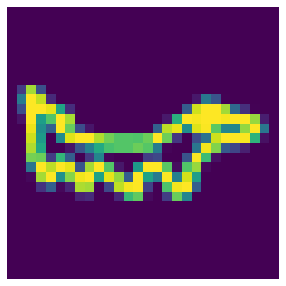

In [20]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(images[0], idx_to_class(labels[0]))

save figure:  quickdraw_visualization


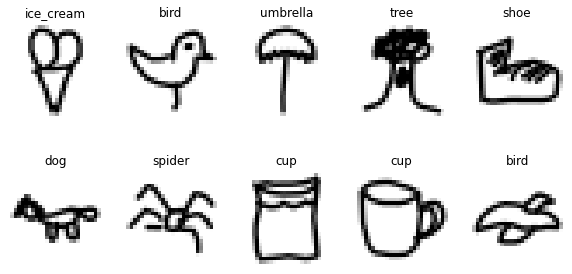

In [36]:
plt.figure(figsize=(10, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].squeeze(), cmap='binary')  # X_train [32, 1, 28, 28] -> [i, :, :, :] -> squeeze() -> [28, 28]
  plt.title(idx_to_class(y_train[i]))
  
save_figure('quickdraw_visualization')